# 2019/01/24    - test campaign 1, day 8 (Thursday. Mirror Lab spent Wed measuring CGH for M1 and M3)

## 3.9 Optimize M1-M3-M1 figure with extra quad forces (3+4 iterations)

In [7]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import glob
import pandas as pd

%matplotlib inline
plt.jet()

dateID = 190124
testID = '3-9' 

<Figure size 432x288 with 0 Axes>

## M1-M3-M1 global optimization, again, now with addtional forces under quads
300N on outer quads, 200N on inner quads, according to notes by Chris on confluence.

3-9 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190124_3-9/M1M3 set0 190124 3-9.h5: date not in h5 file. 
/Processed/190124_3-9/M1M3 set0 190124 3-9.h5: date not in h5 file. 
3-9 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190124_3-9/M1M3 set1 190124 3-9.h5: date not in h5 file. 
/Processed/190124_3-9/M1M3 set1 190124 3-9.h5: date not in h5 file. 
3-9 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190124_3-9/M1M3 set2 190124 3-9.h5: date not in h5 file. 
/Processed/190124_3-9/M1M3 set2 190124 3-9.h5: date not in h5 file. 


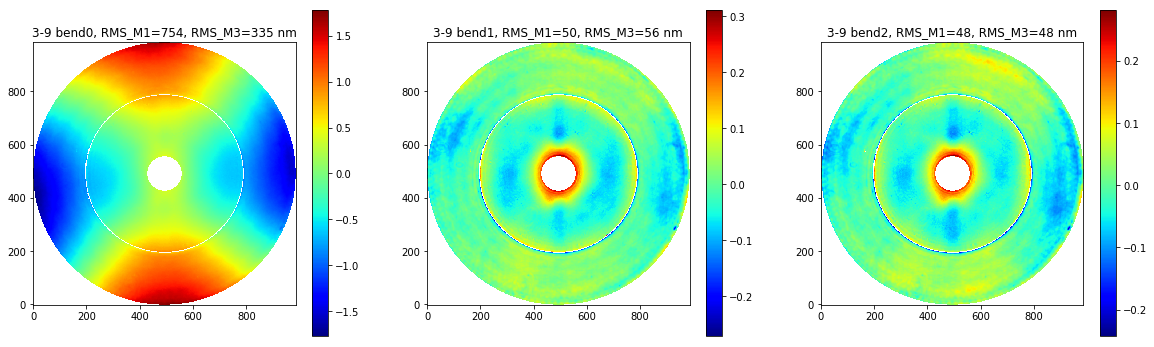

In [8]:
testID = '3-9'
fig, ax = plt.subplots(1,3,figsize=(20,6))
i = 0
for bend in range(3):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s/M1M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
    
    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms)) 

/Users/bxin/largeData/M1M3_ML/Processed/190124_3-9/M1M3 set0 190124 3-9M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190124_3-9/M1M3 set1 190124 3-9M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190124_3-9/M1M3 set2 190124 3-9M1M3 fit mode amps.csv


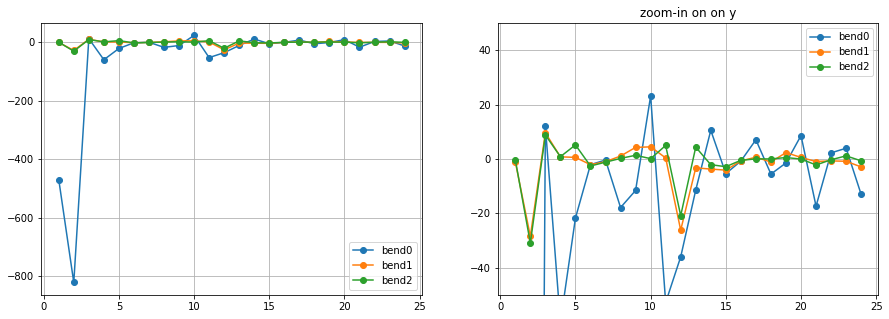

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(3):
    csvName = '%s/Processed/%d_%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])

### Another round of M1-M3-M1 optimization, now we bump up forces on inner quads to 350N.

3-9 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190124_3-9a/M1M3 set0 190124 3-9.h5: date not in h5 file. 
/Processed/190124_3-9a/M1M3 set0 190124 3-9.h5: date not in h5 file. 
3-9 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190124_3-9a/M1M3 set1 190124 3-9.h5: date not in h5 file. 
/Processed/190124_3-9a/M1M3 set1 190124 3-9.h5: date not in h5 file. 


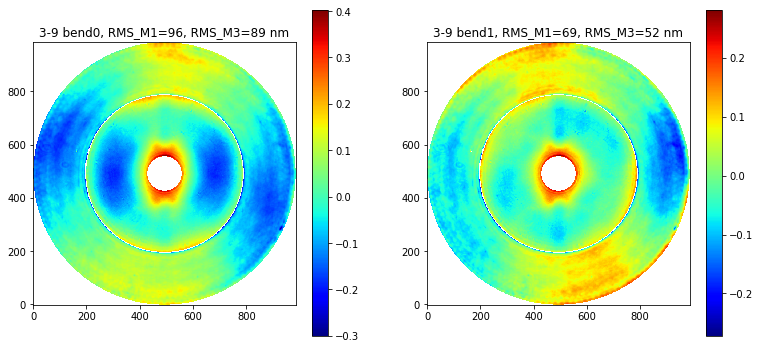

In [10]:
testID = '3-9'
iter = 'a'
fig, ax = plt.subplots(1,3,figsize=(20,6))
i = 0
for bend in range(2):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
    
    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms)) 
fig.delaxes(ax.flatten()[2])       

/Users/bxin/largeData/M1M3_ML/Processed/190124_3-9a/M1M3 set0 190124 3-9M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190124_3-9a/M1M3 set1 190124 3-9M1M3 fit mode amps.csv


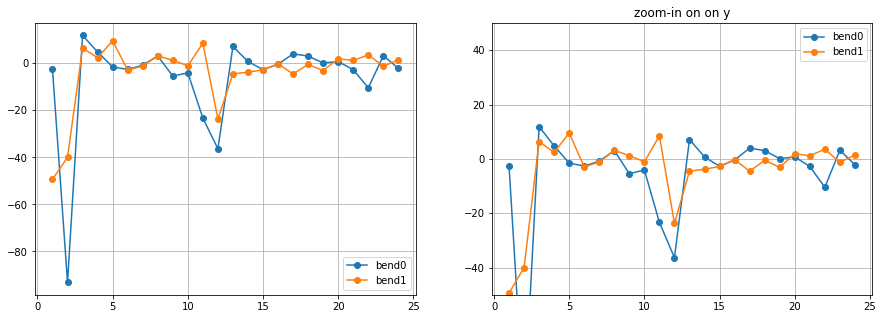

In [11]:
iter = 'a'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(2):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])

### Buddy started using bending mode 27, which he claimed to have most bending on M3, while little shape chagne to M1.
### This brought the surface error for M1 to <40nm rms and M3 to <30 nm rms.

3-9 bend1 ------ irow = 0, icol = 0, -----------------------------
/Processed/190124_3-9 No Stage InOut Comp/M1M3 set1 190124 3-9.h5: date not in h5 file. 
/Processed/190124_3-9 No Stage InOut Comp/M1M3 set1 190124 3-9.h5: date not in h5 file. 
3-9 bend2 ------ irow = 0, icol = 1, -----------------------------
/Processed/190124_3-9 No Stage InOut Comp/M1M3 set2 190124 3-9.h5: date not in h5 file. 
/Processed/190124_3-9 No Stage InOut Comp/M1M3 set2 190124 3-9.h5: date not in h5 file. 
3-9 bend3 ------ irow = 0, icol = 2, -----------------------------
/Processed/190124_3-9 No Stage InOut Comp/M1M3 set3 190124 3-9.h5: date not in h5 file. 
/Processed/190124_3-9 No Stage InOut Comp/M1M3 set3 190124 3-9.h5: date not in h5 file. 


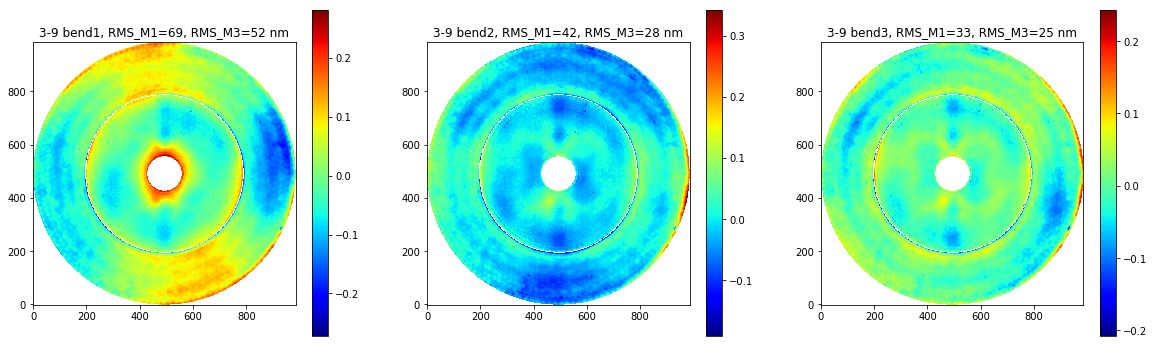

In [12]:
testID = '3-9'
iter = ' No Stage InOut Comp'
fig, ax = plt.subplots(1,3,figsize=(20,6))
i = 0
for bend in range(1,4):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms)) 

/Users/bxin/largeData/M1M3_ML/Processed/190124_3-9 No Stage InOut Comp/M1M3 set1 190124 3-9M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190124_3-9 No Stage InOut Comp/M1M3 set2 190124 3-9M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190124_3-9 No Stage InOut Comp/M1M3 set3 190124 3-9M1M3 fit mode amps.csv


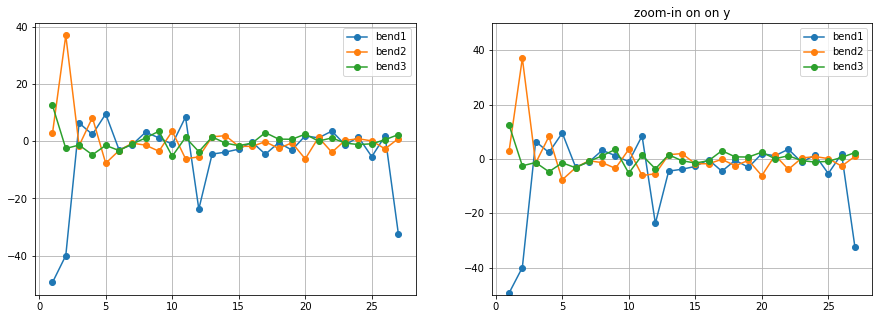

In [13]:
iter = ' No Stage InOut Comp'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(1,4):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])

#### A different kind of data processing? not sure what this is. 
The time stamps are the same as the later iteration above. So the raw data must be the same.

3-9 bend3 ------ irow = 0, icol = 0, -----------------------------
/Processed/190124_3-9 With Stage InOut Comp Last Iter/M1M3 set3 190124 3-9.h5: date not in h5 file. 
/Processed/190124_3-9 With Stage InOut Comp Last Iter/M1M3 set3 190124 3-9.h5: date not in h5 file. 


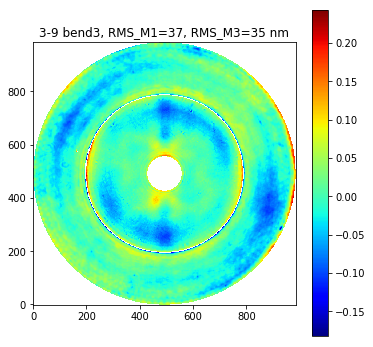

In [14]:
testID = '3-9'
iter = ' With Stage InOut Comp Last Iter'
fig, ax = plt.subplots(1,3,figsize=(20,6))
i = 0
for bend in range(3,4):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
    
    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms)) 
fig.delaxes(ax.flatten()[1])    
fig.delaxes(ax.flatten()[2])    

/Users/bxin/largeData/M1M3_ML/Processed/190124_3-9 With Stage InOut Comp Last Iter/M1M3 set3 190124 3-9M1M3 fit mode amps.csv


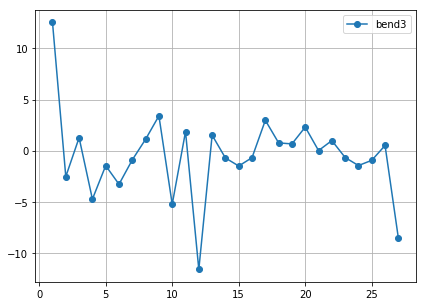

In [15]:
iter = ' With Stage InOut Comp Last Iter'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(3,4):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
fig.delaxes(ax.flatten()[1])    